In [1414]:
import pandas as pd

In [1415]:
credit = pd.read_csv("/content/drive/MyDrive/bc3409/wk6_assignment/Credit card default I.csv")

## **Data Cleaning**

In [1416]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

No missing data, hence no imputation needed

In [1417]:
# Change heading names
credit = credit.rename(columns={'default payment next month': 'default',
                        'PAY_0': 'PAY_1'})
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,1,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [1418]:
# Categorical variables values
print(credit['SEX'].unique())
print(credit['EDUCATION'].unique())
print(credit['MARRIAGE'].unique())

[1 2]
[2 1 3 5 4 6 0]
[1 2 3 0]


Since 0 in "Marriage" and 0, 5 and 6 in "Education" are all undocumented in the data dictionary respectively, we categorize them under "others" category.


In [1419]:
credit['MARRIAGE'] = credit['MARRIAGE'].replace(0,3)
credit['EDUCATION'] = credit['EDUCATION'].replace([0, 5, 6], 4)

In [1420]:
# PAY_X values
print(credit['PAY_1'].unique())
print(credit['PAY_2'].unique())
print(credit['PAY_3'].unique())
print(credit['PAY_4'].unique())
print(credit['PAY_5'].unique())
print(credit['PAY_6'].unique())

[ 2 -1  0 -2  1  3  4  8  7  5  6]
[ 2  0 -1 -2  3  5  7  4  1  6  8]
[-1  0  2 -2  3  4  6  7  1  5  8]
[-1  0 -2  2  3  4  5  7  6  1  8]
[-2  0 -1  2  3  5  4  7  8  6]
[-2  2  0 -1  3  6  4  7  8  5]


According to the data description, PAY_X indicates the number of months of delay in payment.
-1 indicates "pay duly", while 1-9 indicates " payment delay for x months".

However, there are -2 and 0 values which are not documented in the data description.

Upon further exploration, the -2 value is associated with non-zero bill amount and 0 value is associated with partial bill payment.

Furthermore, these 2 values take up a large proportion of all the values for PAY_X columns. Thus, they should not be overlooked or replaced.

In [1421]:
# BILL_AMTX description
credit[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


Negative values are present, has to be investigated

In [1422]:
# PAY_AMTX description
credit[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [1423]:
credit[credit.default == 1][['BILL_AMT6', 'PAY_AMT6', 'PAY_6',
                             'BILL_AMT5', 'PAY_AMT5', 'PAY_5',
                             'BILL_AMT4', 'PAY_AMT4', 'PAY_4',
                             'BILL_AMT3', 'PAY_AMT3', 'PAY_3',
                             'BILL_AMT2', 'PAY_AMT2', 'PAY_2',
                             'BILL_AMT1', 'PAY_AMT1', 'PAY_1']]

,BILL_AMT6,PAY_AMT6,PAY_6,BILL_AMT5,PAY_AMT5,PAY_5,BILL_AMT4,PAY_AMT4,PAY_4,BILL_AMT3,PAY_AMT3,PAY_3,BILL_AMT2,PAY_AMT2,PAY_2,BILL_AMT1,PAY_AMT1,PAY_1
0,0,0,-2,0,0,-2,0,0,-1,689,0,-1,3102,689,2,3913,0,2
1,3261,2000,2,3455,0,0,3272,1000,0,2682,1000,0,1725,1000,2,2682,0,-1
13,36894,0,2,36137,1500,0,66782,3000,0,65701,3000,2,67369,0,2,65802,3200,1
16,19104,0,2,17905,1650,2,18338,0,2,17428,1500,2,18010,0,0,15376,3200,0
21,316,0,-1,632,316,-1,0,632,-1,316,0,-1,316,316,-1,316,316,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29991,2500,0,2,2500,0,2,2500,0,2,2500,0,2,2500,0,2,2500,0,3
29994,81158,4000,2,82607,0,2,77519,7000,2,79384,0,2,77708,3500,2,72557,7000,2
29997,19357,3100,0,20582,2000,0,20878,4200,-1,2758,22000,2,3356,0,3,3565,0,4
29998,48944,1804,-1,11855,52964,0,52774,1926,0,76304,1178,0,78379,3409,-1,-1645,85900,1


Based on my interpretation of the data, in one month, person incurs BILL_AMTX, pays PAY_AMTX. The month after the person has to pay BILL_AMTX - PAY_AMTX + BILL_AMT(X-1). And the person pays PAY_AMT(X-1).

In [1424]:
#Drop column "ID" as
credit = credit.drop(columns="ID")

## **Data Visualization**

In [1425]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

<Axes: xlabel='default', ylabel='count'>

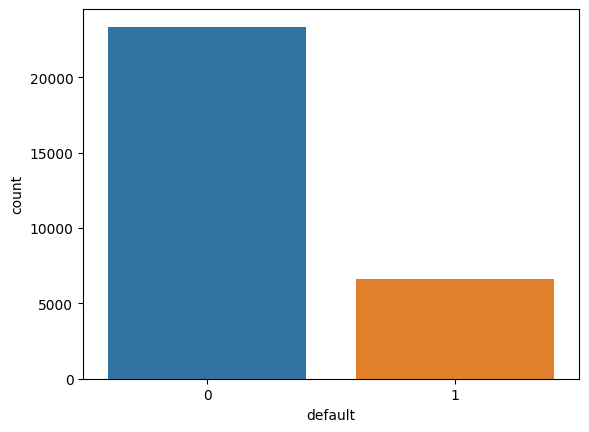

In [1426]:
sns.countplot(credit,x="default")

In [1427]:
default = credit.groupby(['default']).size()
default['percentage'] = (default[1]/(default[0] + default[1]))
default

default
0             23364.0000
1              6636.0000
percentage        0.2212
dtype: float64

22.1% of the people default payment next month

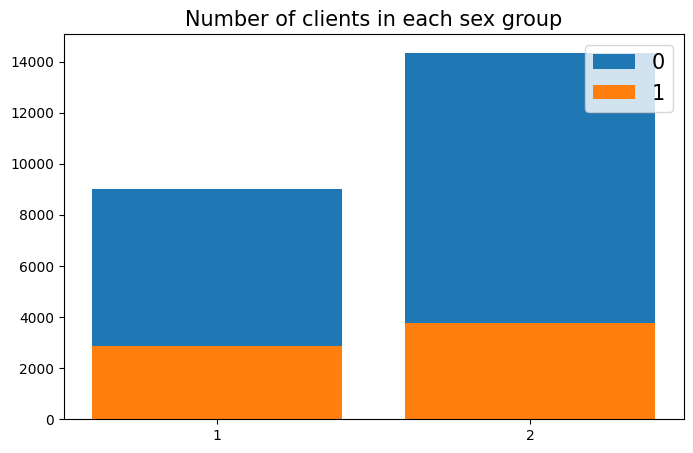

In [1428]:
sex_0 = (credit.SEX[credit['default']==0].value_counts())
sex_1 = (credit.SEX[credit['default']==1].value_counts())

plt.subplots(figsize=(8,5))
plt.bar(sex_0.index, sex_0.values, label = '0')
plt.bar(sex_1.index, sex_1.values, label = '1')
plt.xticks(np.arange(1,3, step=1))
plt.title("Number of clients in each sex group", fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.show()

In [1429]:
gender = credit.groupby(['SEX', 'default']).size().unstack(1)
gender['percentage'] = (gender[1]/(gender[0] + gender[1]))
gender

default,0,1,percentage
SEX,,,
1,9015,2874,0.241736
2,14349,3762,0.207719


24.2% of males default payment next month, which is higher than 20.8% of females who default payment next month. From this, we can deduce that males have a higher probability of defaulting, however we need to do further analysis to confirm this.

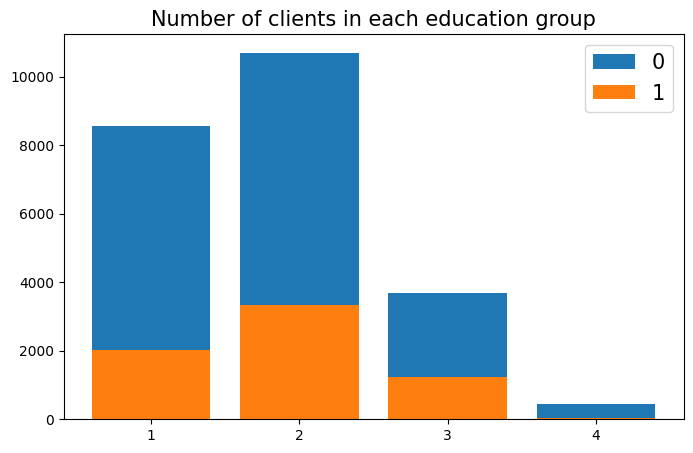

In [1430]:
edu_0 = (credit.EDUCATION[credit['default']==0].value_counts())
edu_1 = (credit.EDUCATION[credit['default']==1].value_counts())

plt.subplots(figsize=(8,5))
plt.bar(edu_0.index, edu_0.values, label = '0')
plt.bar(edu_1.index, edu_1.values, label = '1')
plt.xticks(np.arange(1,5, step=1))
plt.title("Number of clients in each education group", fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.show()

In [1431]:
education = credit.groupby(['EDUCATION', 'default']).size().unstack(1)
education['percentage'] = (education[1]/(education[0] + education[1]))
education

default,0,1,percentage
EDUCATION,,,
1,8549,2036,0.192348
2,10700,3330,0.237349
3,3680,1237,0.251576
4,435,33,0.070513


In general, people with more education are less likely to default on their loans next month. However, there is an exception for the category labeled "Other," which according to the further research, is at a lower level than high school. However, this category is relatively small and will not have a significant impact on the overall results.

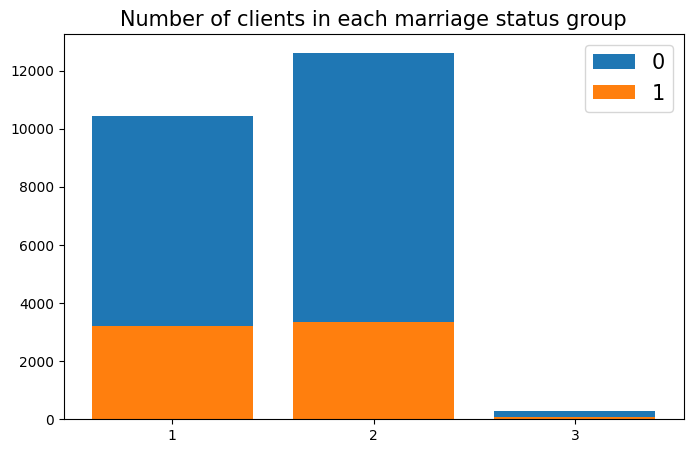

In [1432]:
mar_0 = (credit.MARRIAGE[credit['default']==0].value_counts())
mar_1 = (credit.MARRIAGE[credit['default']==1].value_counts())

plt.subplots(figsize=(8,5))
plt.bar(mar_0.index, mar_0.values, label = '0')
plt.bar(mar_1.index, mar_1.values, label = '1')
plt.xticks(np.arange(1,4, step=1))
plt.title("Number of clients in each marriage status group", fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.show()

In [1433]:
marriage = credit.groupby(['MARRIAGE', 'default']).size().unstack(1)
marriage['percentage'] = (marriage[1]/(marriage[0] + marriage[1]))
marriage

default,0,1,percentage
MARRIAGE,,,
1,10453,3206,0.234717
2,12623,3341,0.209283
3,288,89,0.236074


Married people and 'Other' group are most likely to default.

<Axes: xlabel='default', ylabel='LIMIT_BAL'>

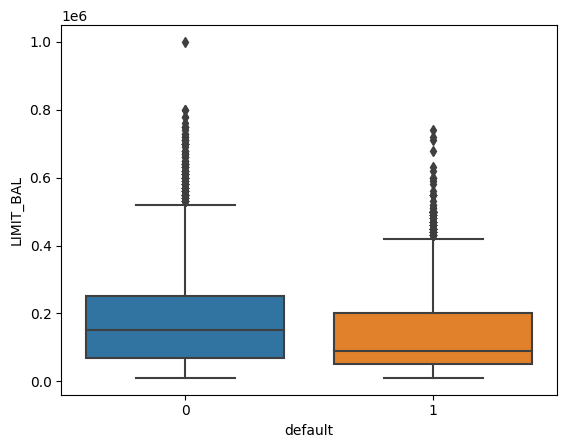

In [1434]:
sns.boxplot(data=credit, x="default", y="LIMIT_BAL")

From the graph, it seems like people with a lower limit balance are more likely to default. Hence, limit balance affects probability of default.

<Axes: xlabel='default', ylabel='AGE'>

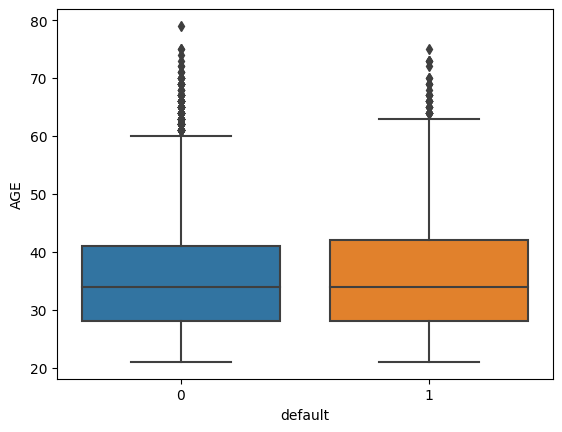

In [1435]:
sns.boxplot(data=credit, x="default", y="AGE")

Similary, from the graph, it seems like there is no correlation between age and default next month.

<Axes: xlabel='default', ylabel='PAY_1'>

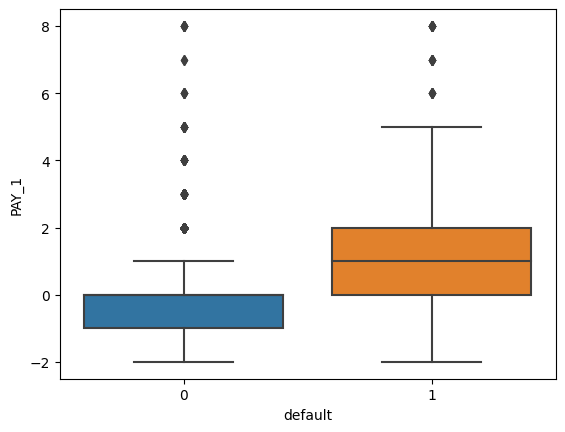

In [1436]:
sns.boxplot(data=credit, x="default", y="PAY_1")

<Axes: xlabel='default', ylabel='PAY_2'>

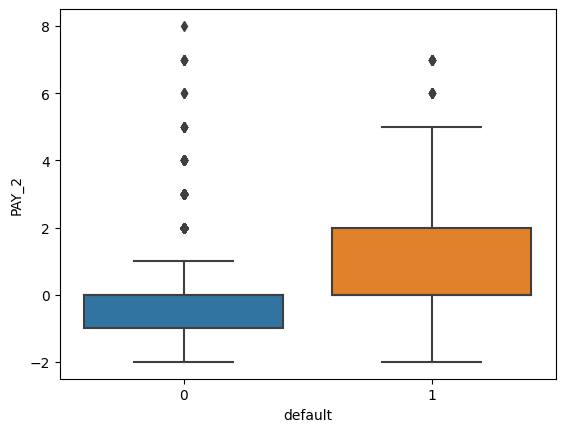

In [1437]:
sns.boxplot(data=credit, x="default", y="PAY_2")

<Axes: xlabel='default', ylabel='PAY_3'>

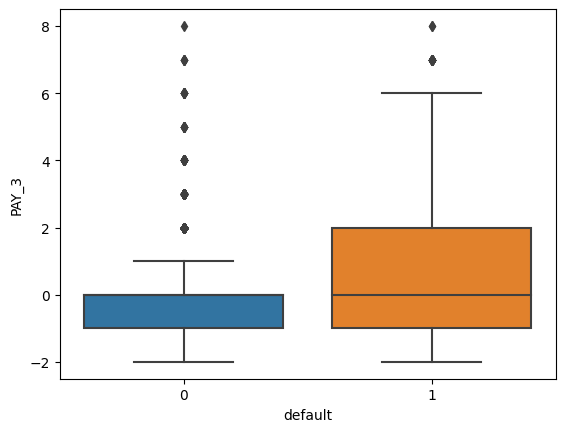

In [1438]:
sns.boxplot(data=credit, x="default", y="PAY_3")

<Axes: xlabel='default', ylabel='PAY_4'>

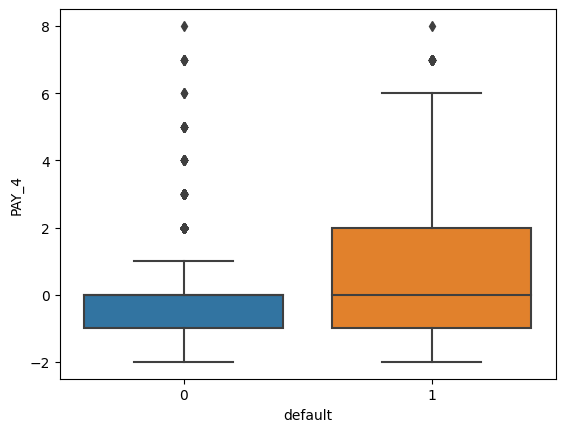

In [1439]:
sns.boxplot(data=credit, x="default", y="PAY_4")

<Axes: xlabel='default', ylabel='PAY_5'>

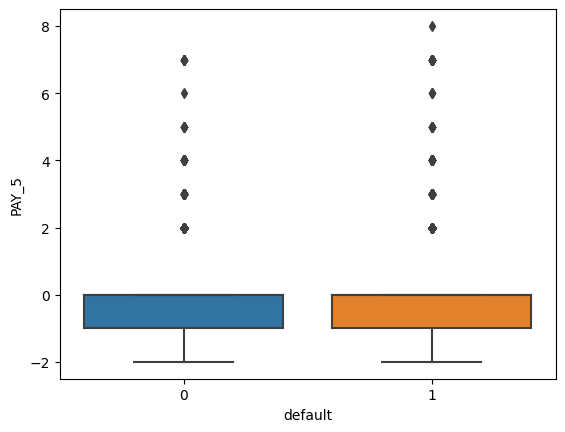

In [1440]:
sns.boxplot(data=credit, x="default", y="PAY_5")

<Axes: xlabel='default', ylabel='PAY_6'>

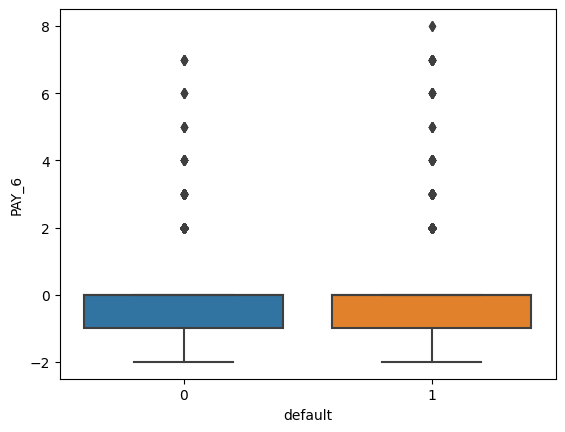

In [1441]:
sns.boxplot(data=credit, x="default", y="PAY_6")

In general, we can see that the mean and interquartile range of PAY_X columns for people who are defaulting is higher than for people who do not default. Therefore, PAY_X columns do have an impact on whether a person defaults or not.

<Axes: >

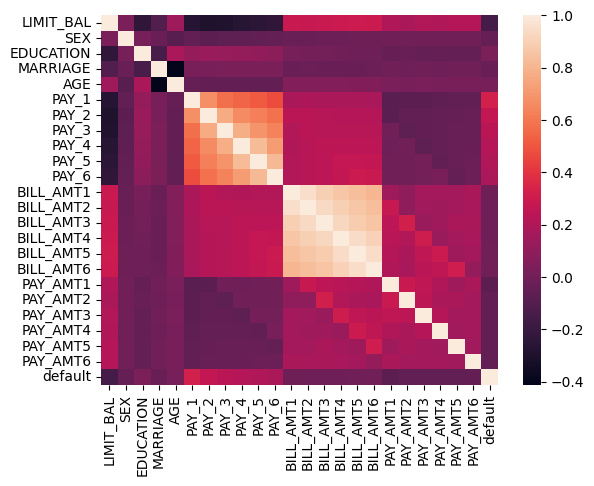

In [1442]:
sns.heatmap(credit.corr())

From the correlation matrix, we can see that indeed LIMIT_BAL has very low correlation to whether the person defaults or not with a correlation very close to 0.

Similarly, SEX, MARRIAGE and AGE have a correlation very close to 0.

However, the PAY_X columns seem to have the highest correlation with defaulting of around 0.2.

In [1443]:
credit_billpay = credit[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                         'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]

<Axes: >

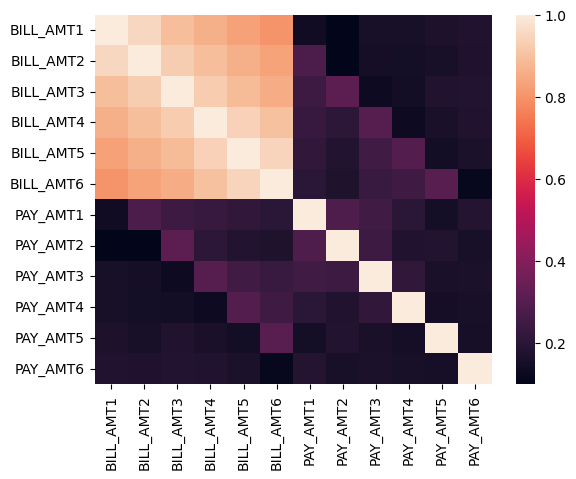

In [1444]:
sns.heatmap(credit_billpay.corr())

If we zoom into the correlation matrix, we can see that BILL_AMTX and PAY_AMTX are correlated, as each BILL_AMT(x) has a correlation of around 0.38 to 0.42 with each PAY_AMT(X-1).

Therefore, we can deduce that with each BILL_AMTX, this bill amount is paid by PAY_AMT(X-1) and PAY_AMT(X-1) is dependent on BILL_AMTX.

This means that if the bill is incurred in April (BILL_AMT6), the majority of payment for this bill is made in May (PAY_AMT5).

Let's take a look at the BILL_AMT and PAY_AMT for one person as an example.

In [1445]:
credit_billpay_bill = pd.DataFrame(credit_billpay[['BILL_AMT6', 'BILL_AMT5', 'BILL_AMT4', 'BILL_AMT3', 'BILL_AMT2', 'BILL_AMT1']].iloc[0].reset_index(drop=True))
credit_billpay_pay = pd.DataFrame(credit_billpay[['PAY_AMT6', 'PAY_AMT5', 'PAY_AMT4', 'PAY_AMT3', 'PAY_AMT2', 'PAY_AMT1']].iloc[0].reset_index(drop=True))
credit_billpay_month = pd.DataFrame(['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep'])
credit_billpay_0 = pd.merge(credit_billpay_bill, credit_billpay_pay, left_index=True, right_index=True)
credit_billpay_0 = pd.merge(credit_billpay_0, credit_billpay_month, left_index=True, right_index=True)
credit_billpay_0 = credit_billpay_0.rename(columns = {
    '0_x' : 'BILL_AMT',
    '0_y' : 'PAY_AMT',
    0 : 'Month'
})
credit_billpay_0

,BILL_AMT,PAY_AMT,Month
0,0,0,Apr
1,0,0,May
2,0,0,Jun
3,689,0,Jul
4,3102,689,Aug
5,3913,0,Sep


<Axes: xlabel='Month', ylabel='BILL_AMT'>

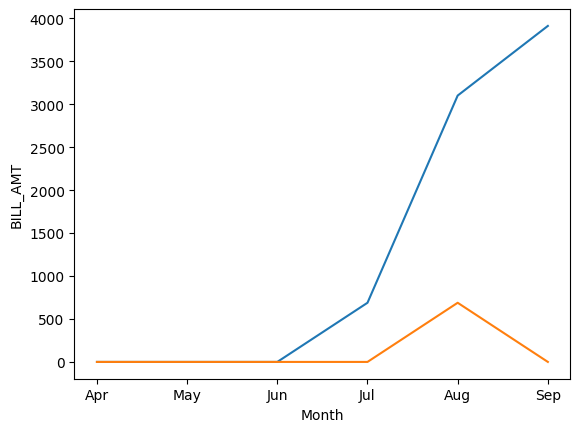

In [1446]:
sns.lineplot(data=credit_billpay_0, x='Month', y='BILL_AMT')
sns.lineplot(data=credit_billpay_0, x='Month', y='PAY_AMT')

As shown, we can see that there is a correlation between BILL_AMT and PAY_AMT, as each bill amount would be paid in the following month.

In [1447]:
credit_paystatus = credit[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]

<Axes: >

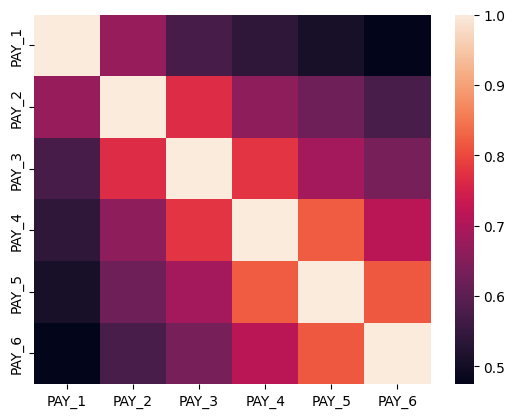

In [1448]:
sns.heatmap(credit_paystatus.corr())

Similarly, if we zoom in even smaller, we can see that PAY_(X) is dependent on PAY_(X-1) with a correlation of about 0.7 to 0.85.

This makes sense because each PAY_X is cumulative and dependent on the previous month's PAY_X (PAY_(x+1)).

In [1449]:
credit2 = credit.copy()

In [1450]:
credit2['UNPAID_1'] = (credit2.BILL_AMT2 - credit2.PAY_AMT1)
credit2['UNPAID_2'] = (credit2.BILL_AMT3 - credit2.PAY_AMT2)
credit2['UNPAID_3'] = (credit2.BILL_AMT4 - credit2.PAY_AMT3)
credit2['UNPAID_4'] = (credit2.BILL_AMT5 - credit2.PAY_AMT4)
credit2['UNPAID_5'] = (credit2.BILL_AMT6 - credit2.PAY_AMT5)

credit2['UNPAID_1'] = credit2['UNPAID_1'].fillna(0)
credit2['UNPAID_2'] = credit2['UNPAID_2'].fillna(0)
credit2['UNPAID_3'] = credit2['UNPAID_3'].fillna(0)
credit2['UNPAID_4'] = credit2['UNPAID_4'].fillna(0)
credit2['UNPAID_5'] = credit2['UNPAID_5'].fillna(0)

In [1451]:
credit2['GAP_1'] = (credit2.LIMIT_BAL - credit2.BILL_AMT1) / credit2.LIMIT_BAL
credit2['GAP_2'] = (credit2.LIMIT_BAL - credit2.BILL_AMT2) / credit2.LIMIT_BAL
credit2['GAP_3'] = (credit2.LIMIT_BAL - credit2.BILL_AMT3) / credit2.LIMIT_BAL
credit2['GAP_4'] = (credit2.LIMIT_BAL - credit2.BILL_AMT4) / credit2.LIMIT_BAL
credit2['GAP_5'] = (credit2.LIMIT_BAL - credit2.BILL_AMT5) / credit2.LIMIT_BAL
credit2['GAP_6'] = (credit2.LIMIT_BAL - credit2.BILL_AMT6) / credit2.LIMIT_BAL

<Axes: xlabel='default', ylabel='GAP_1'>

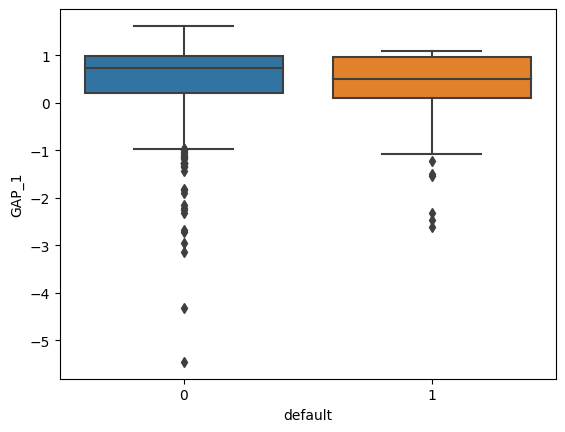

In [1452]:
sns.boxplot(data=credit2, x='default', y="GAP_1")

<Axes: xlabel='default', ylabel='GAP_2'>

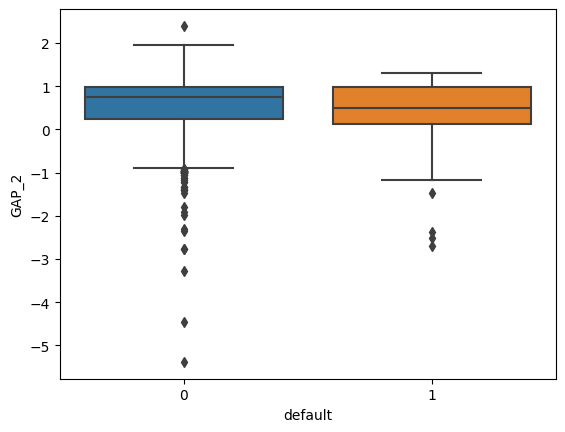

In [1453]:
sns.boxplot(data=credit2, x='default', y="GAP_2")

<Axes: xlabel='default', ylabel='GAP_3'>

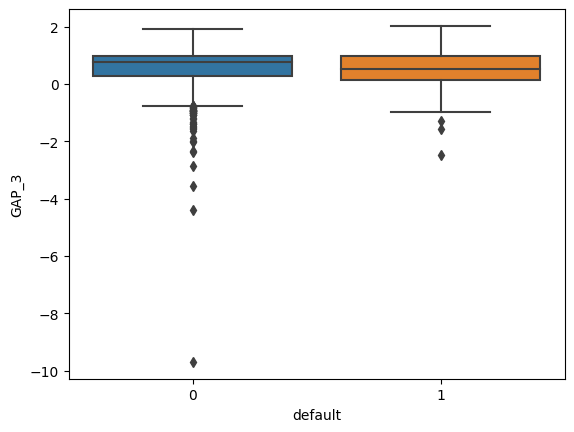

In [1454]:
sns.boxplot(data=credit2, x='default', y="GAP_3")

<Axes: xlabel='default', ylabel='GAP_4'>

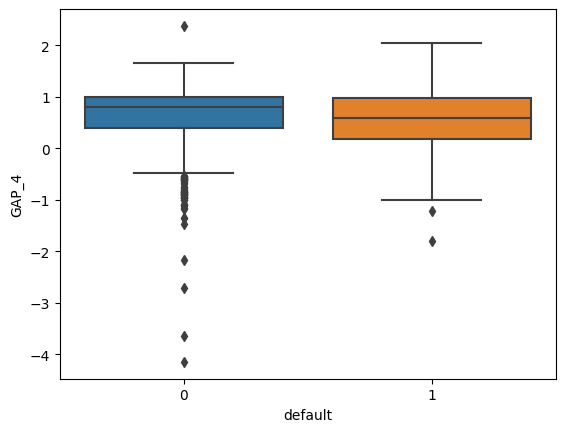

In [1455]:
sns.boxplot(data=credit2, x='default', y="GAP_4")

<Axes: xlabel='default', ylabel='GAP_5'>

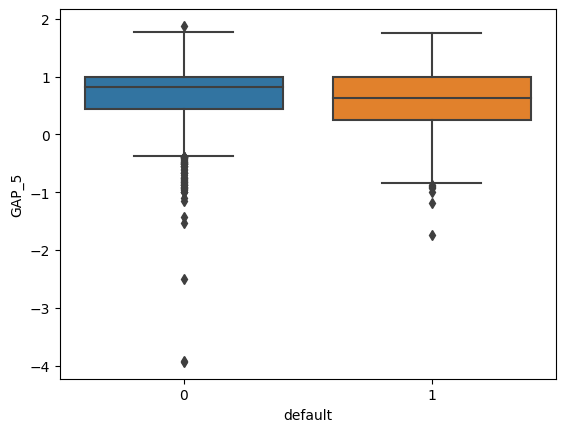

In [1456]:
sns.boxplot(data=credit2, x='default', y="GAP_5")

<Axes: xlabel='default', ylabel='GAP_6'>

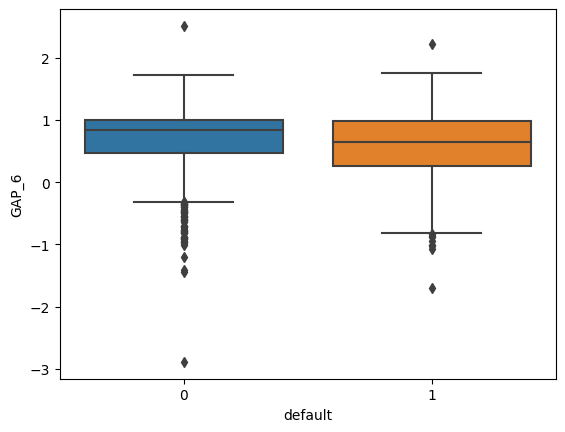

In [1457]:
sns.boxplot(data=credit2, x='default', y="GAP_6")

As seen from the graphs above, we can see that people who default have a lower gap between the bill amount and limit balance every month, with a lower mean, 25th percentile and 75th percentile.

This means that people who spend very close to their limit balance every month are more likely to default.

In [1458]:
credit2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 35 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  30000 non-null  int64  
 1   SEX        30000 non-null  int64  
 2   EDUCATION  30000 non-null  int64  
 3   MARRIAGE   30000 non-null  int64  
 4   AGE        30000 non-null  int64  
 5   PAY_1      30000 non-null  int64  
 6   PAY_2      30000 non-null  int64  
 7   PAY_3      30000 non-null  int64  
 8   PAY_4      30000 non-null  int64  
 9   PAY_5      30000 non-null  int64  
 10  PAY_6      30000 non-null  int64  
 11  BILL_AMT1  30000 non-null  int64  
 12  BILL_AMT2  30000 non-null  int64  
 13  BILL_AMT3  30000 non-null  int64  
 14  BILL_AMT4  30000 non-null  int64  
 15  BILL_AMT5  30000 non-null  int64  
 16  BILL_AMT6  30000 non-null  int64  
 17  PAY_AMT1   30000 non-null  int64  
 18  PAY_AMT2   30000 non-null  int64  
 19  PAY_AMT3   30000 non-null  int64  
 20  PAY_AM

## **Creating Dummy Variables**

In [1459]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_1      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

In [1460]:
# Create Dummy Variables for "SEX", "EDUCATION", "MARRIAGE" and PAY_X variables
pay = ["PAY_" + str(i) for i in range(1, 7)]
dummy_list = ["SEX", "EDUCATION", "MARRIAGE"]

for col in pay + dummy_list:
    credit = pd.get_dummies(credit, columns=[col])

credit.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_6_8,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,20000,24,3913,3102,689,0,0,0,0,689,...,0,1,0,0,1,0,0,1,0,0
1,120000,26,2682,1725,2682,3272,3455,3261,0,1000,...,0,0,1,0,1,0,0,0,1,0
2,90000,34,29239,14027,13559,14331,14948,15549,1518,1500,...,0,0,1,0,1,0,0,0,1,0
3,50000,37,46990,48233,49291,28314,28959,29547,2000,2019,...,0,0,1,0,1,0,0,1,0,0
4,50000,57,8617,5670,35835,20940,19146,19131,2000,36681,...,0,1,0,0,1,0,0,1,0,0


In [1386]:
credit.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_6_8,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,20000,24,3913,3102,689,0,0,0,0,689,...,0,1,0,0,1,0,0,1,0,0
1,120000,26,2682,1725,2682,3272,3455,3261,0,1000,...,0,0,1,0,1,0,0,0,1,0
2,90000,34,29239,14027,13559,14331,14948,15549,1518,1500,...,0,0,1,0,1,0,0,0,1,0
3,50000,37,46990,48233,49291,28314,28959,29547,2000,2019,...,0,0,1,0,1,0,0,1,0,0
4,50000,57,8617,5670,35835,20940,19146,19131,2000,36681,...,0,1,0,0,1,0,0,1,0,0


In [1387]:
Y = credit['default']
X = credit.drop(columns=['default'])

## **Train Test Split**

In [1388]:
from sklearn.model_selection import train_test_split

In [1389]:
#Split Train Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

## **Oversample minority**

In [1390]:
from imblearn.over_sampling import SMOTE

In [1391]:
Y_train.value_counts()

0    18668
1     5332
Name: default, dtype: int64

'0' is the majority class, while '1' is the minority class. We want to remove this class imbalance.

In [1392]:
#Oversample minority
X_train, Y_train = SMOTE().fit_resample(X_train, Y_train)

 SMOTE is an oversampling technique that generates synthetic samples from the minority class instead of duplicating them. It does this by selecting two or more similar data points from the minority class and randomly perturbing their features to create a new synthetic data point. SMOTE is supposed to avoid overfitting problems, but it does risk adding noise to the model.

In [1393]:
Y_train.value_counts()

0    18668
1    18668
Name: default, dtype: int64

## **Normalization**

In [1394]:
#Normalize BILL_AMTX & PAY_AMTX Columns
from scipy import stats
normalize = ["BILL_AMT" + str(i) for i in range(1, 7)]
normalize2 = ["PAY_AMT" + str(i) for i in range(1, 7)]

for col in normalize + normalize2:
    X_train[col] = stats.zscore(X_train[col])
    X_test[col] = stats.zscore(X_test[col])

Normalization is done by transforming the values of each feature to a range of 0 to 1, or to a standard normal distribution with a mean of 0 and a standard deviation of 1. This is done to facilitate data analysis and modeling, and to reduce the impact of different scales on the accuracy of machine learning models.

## **Model Training**

In [ ]:
from sklearn import linear_model, tree, ensemble, neural_network
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [ ]:
# Logistic Regression
model1 = linear_model.LogisticRegression(max_iter=2000, random_state=288)
model1.fit(X_train, Y_train)
pred1 = model1.predict(X_test)

cm1 = confusion_matrix(Y_test, pred1)
print(classification_report(Y_test, pred1))
print("Accuracy is ", (cm1[0,0]+cm1[1,1])/sum(sum(cm1)))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4696
           1       0.00      0.00      0.00      1304

    accuracy                           0.78      6000
   macro avg       0.39      0.50      0.44      6000
weighted avg       0.61      0.78      0.69      6000

Accuracy is  0.7826666666666666


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Logistic Regression Confusion Matrix')

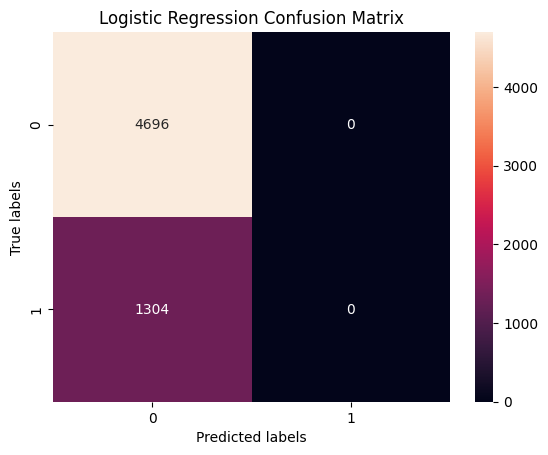

In [ ]:
matrix1 = plt.subplot()

sns.heatmap(cm1, annot=True, fmt='g')
matrix1.set_xlabel('Predicted labels')
matrix1.set_ylabel('True labels')
matrix1.set_title('Logistic Regression Confusion Matrix')

In [ ]:
# Decision Tree
model2 = tree.DecisionTreeClassifier(random_state=288)
model2.fit(X_train, Y_train)
pred2 = model2.predict(X_test)

cm2 = confusion_matrix(Y_test, pred2)
print(classification_report(Y_test, pred2))
print("Accuracy is ", (cm2[0,0]+cm2[1,1])/sum(sum(cm2)))

              precision    recall  f1-score   support

           0       0.83      0.75      0.79      4696
           1       0.33      0.45      0.38      1304

    accuracy                           0.68      6000
   macro avg       0.58      0.60      0.58      6000
weighted avg       0.72      0.68      0.70      6000

Accuracy is  0.6835


Text(0.5, 1.0, 'Decision Tree Confusion Matrix')

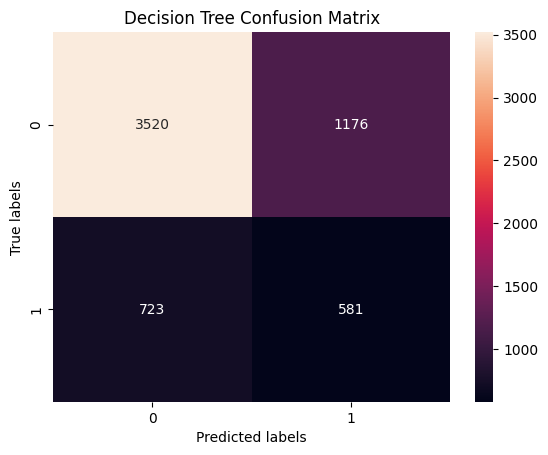

In [ ]:
matrix2 = plt.subplot()

sns.heatmap(cm2, annot=True, fmt='g')
matrix2.set_xlabel('Predicted labels')
matrix2.set_ylabel('True labels')
matrix2.set_title('Decision Tree Confusion Matrix')

In [ ]:
# Random Forest
model3 = ensemble.RandomForestClassifier(random_state=288)
model3.fit(X_train, Y_train)
pred3 = model3.predict(X_test)

cm3 = confusion_matrix(Y_test, pred3)
print(classification_report(Y_test, pred3))
print("Accuracy is ", (cm3[0,0]+cm3[1,1])/sum(sum(cm3)))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      4696
           1       0.61      0.41      0.49      1304

    accuracy                           0.81      6000
   macro avg       0.73      0.67      0.69      6000
weighted avg       0.80      0.81      0.80      6000

Accuracy is  0.8138333333333333


Text(0.5, 1.0, 'Random Forest Confusion Matrix')

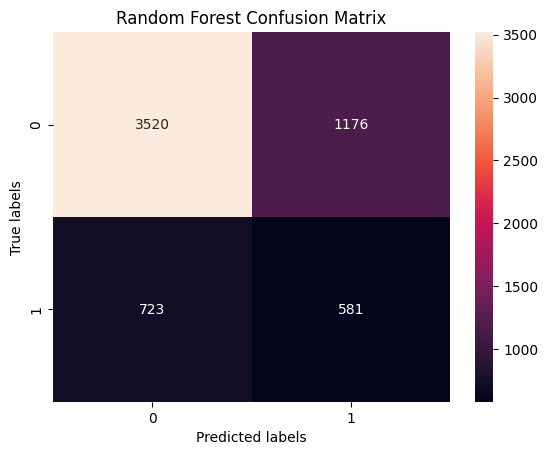

In [ ]:
matrix3 = plt.subplot()

sns.heatmap(cm2, annot=True, fmt='g')
matrix3.set_xlabel('Predicted labels')
matrix3.set_ylabel('True labels')
matrix3.set_title('Random Forest Confusion Matrix')

In [ ]:
# Gradient Boosting
model4 = ensemble.GradientBoostingClassifier(random_state=288)
model4.fit(X_train, Y_train)
pred4 = model4.predict(X_test)

cm4 = confusion_matrix(Y_test, pred4)
print(classification_report(Y_test, pred4))
print("Accuracy is ", (cm4[0,0]+cm4[1,1])/sum(sum(cm4)))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      4696
           1       0.65      0.41      0.50      1304

    accuracy                           0.82      6000
   macro avg       0.75      0.67      0.70      6000
weighted avg       0.81      0.82      0.81      6000

Accuracy is  0.8236666666666667


Text(0.5, 1.0, 'XGBoost Confusion Matrix')

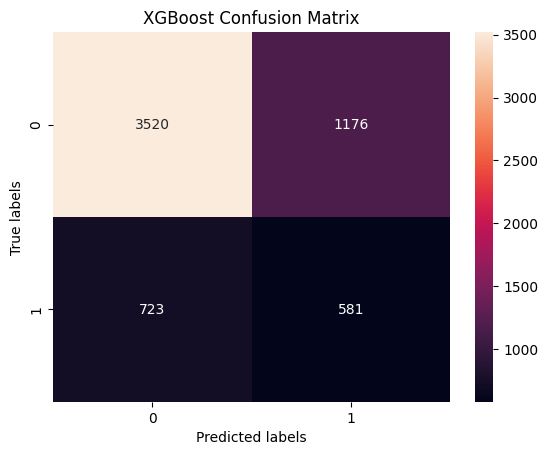

In [ ]:
matrix4 = plt.subplot()

sns.heatmap(cm2, annot=True, fmt='g')
matrix4.set_xlabel('Predicted labels')
matrix4.set_ylabel('True labels')
matrix4.set_title('Gradient Boosting Confusion Matrix')

In [ ]:
# Neural Network (sklearn)
model5 = neural_network.MLPClassifier(random_state=288)
model5.fit(X_train, Y_train)
pred5 = model5.predict(X_test)

cm5 = confusion_matrix(Y_test, pred5)
print(classification_report(Y_test, pred5))
print("Accuracy is ", (cm5[0,0]+cm5[1,1])/sum(sum(cm5)))

              precision    recall  f1-score   support

           0       0.88      0.60      0.71      4696
           1       0.33      0.71      0.45      1304

    accuracy                           0.62      6000
   macro avg       0.60      0.65      0.58      6000
weighted avg       0.76      0.62      0.65      6000

Accuracy is  0.6213333333333333


Text(0.5, 1.0, 'XGBoost Confusion Matrix')

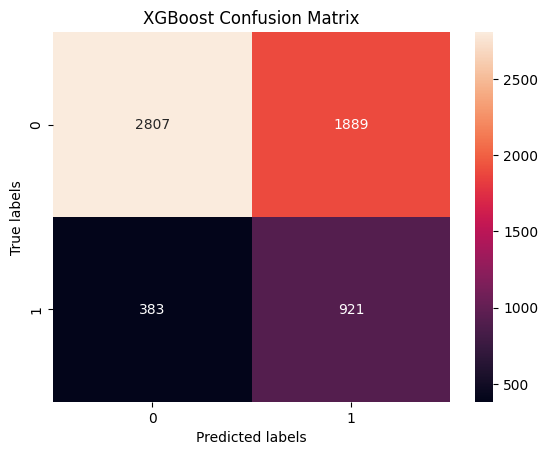

In [ ]:
matrix5 = plt.subplot()

sns.heatmap(cm5, annot=True, fmt='g')
matrix5.set_xlabel('Predicted labels')
matrix5.set_ylabel('True labels')
matrix5.set_title('Gradient Boosting Confusion Matrix')

In [1396]:
# To compute f1 score for Keras Neural Network

from keras import backend as K

def f1_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [1398]:
# Neural Network (Keras)

from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

# Standardize the features (optional but recommended)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model6 = Sequential()

# Add the input layer with the correct number of neurons
input_neurons = X_train.shape[1]
model6.add(Dense(units=input_neurons, input_dim=input_neurons, activation='relu'))

# Add the first hidden layer (similar neurons to the input layer)
model6.add(Dense(units=input_neurons, activation='relu'))

# Add the output layer
model6.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model6.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', f1_score])

# Print a summary of the model's architecture
model6.summary()

# Train the model
trained = model6.fit(X_train, Y_train, epochs=10, batch_size=32)

Model: "sequential_704"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1685 (Dense)          (None, 87)                7656      
                                                                 
 dense_1686 (Dense)          (None, 87)                7656      
                                                                 
 dense_1687 (Dense)          (None, 1)                 88        
                                                                 
Total params: 15400 (60.16 KB)
Trainable params: 15400 (60.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
1167/1167 [==============================] - 4s 3ms/step - loss: 0.3342 - accuracy: 0.8639 - f1_score: 0.8494
Epoch 2/10
1167/1167 [==============================] - 3s 2ms/step - loss: 0.2942 - accuracy: 0.8786 - f1_score: 0.8664
Epoch 3/10
1167/1167 [================

In [1399]:
trained.history['accuracy'][-1]

0.8850706815719604

In [1400]:
trained.history['f1_score'][-1]

0.873108446598053

To build the neural network model, I used Keras and created two hidden layers and a single output layer with 1 neuron. I used the ReLU activation function for the hidden layers and the sigmoid activation function for the output layer.

Additionally, I used the Adam optimizer to optimize the parameters of the model.

## **Hyperparameter Tuning**

We want to finetune the parameters of the various models to get the best set of parameters. We can do this by using GridSearchCV, which gives a parameter space and tests our models on every point of this space. The parameters of the machine learning model are tuned using a technique called cross-validated grid search, which involves trying different values for the parameters and evaluating the performance of the model on a held-out dataset.

The parameter space we want to test for each model is defined in param_grid.

cv is the number of folds to use for cross validation.

The scoring mode will be based on f1-score.

Refit is set to true so that the model will be using the best found parameters on the whole dataset.

In [ ]:
from sklearn.metrics import accuracy_score, make_scorer, f1_score
from sklearn.model_selection import GridSearchCV

In [1404]:
# Get default parameter settings of Logistic Regression
model1.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 2000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 288,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [1410]:
# Logistic Regression with hyperparameter tuning based on accuracy
param_grid = {'penalty': ['none', 'l2'],
              'C': [0.1, 1, 10, 100]}
acc_scorer = make_scorer(accuracy_score)
grid_logreg = GridSearchCV(linear_model.LogisticRegression(max_iter=2000), param_grid, cv = 5, scoring= acc_scorer, refit=True)
%time grid_logreg = grid_logreg.fit(X_train, Y_train)
print(grid_logreg.best_estimator_)
print(grid_logreg.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

CPU times: user 1min 10s, sys: 19.9 s, total: 1min 30s
Wall time: 58.4 s
LogisticRegression(C=1, max_iter=2000)
0.8628208789267313


In [1463]:
grid_logreg = linear_model.LogisticRegression(C=1, max_iter=2000)
grid_logreg.fit(X_train, Y_train)
pred_grid_logreg = grid_logreg.predict(X_test)

cm_grid_logreg = confusion_matrix(Y_test, pred_grid_logreg)
print(classification_report(Y_test, pred_grid_logreg))
print("Accuracy is ", (cm_grid_logreg[0,0]+cm_grid_logreg[1,1])/sum(sum(cm_grid_logreg)))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4696
           1       0.65      0.37      0.47      1304

    accuracy                           0.82      6000
   macro avg       0.75      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000

Accuracy is  0.82


In [ ]:
# Get default parameter settings of Decision Tree
model2.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 288,
 'splitter': 'best'}

In [ ]:
# Decision Tree with hyperparameter tuning based on accuracy
param_grid = {'max_depth': np.arange(3, 10),
             'criterion' : ['gini','entropy'],
             'max_leaf_nodes': [5,10,20,100],
             'min_samples_split': [2, 5, 10, 20]}
acc_scorer = make_scorer(accuracy_score)
grid_tree = GridSearchCV(tree.DecisionTreeClassifier(), param_grid, cv = 5, scoring= acc_scorer, refit=True)
%time grid_tree = grid_tree.fit(X_train, Y_train)
print(grid_tree.best_estimator_)
print(grid_tree.best_score_)

CPU times: user 5min 2s, sys: 276 ms, total: 5min 3s
Wall time: 5min 7s
DecisionTreeClassifier(criterion='entropy', max_depth=9, max_leaf_nodes=100,
                       min_samples_split=20)
0.8357669908999347


In [1465]:
grid_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=9, max_leaf_nodes=100, min_samples_split=20)
grid_tree.fit(X_train, Y_train)
pred_grid_tree = grid_tree.predict(X_test)

cm_grid_tree = confusion_matrix(Y_test, pred_grid_tree)
print(classification_report(Y_test, pred_grid_tree))
print("Accuracy is ", (cm_grid_tree[0,0]+cm_grid_tree[1,1])/sum(sum(cm_grid_tree)))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      4696
           1       0.57      0.44      0.50      1304

    accuracy                           0.81      6000
   macro avg       0.71      0.67      0.69      6000
weighted avg       0.79      0.81      0.80      6000

Accuracy is  0.807


The parameters that have been chosen to optimise the model are:

1. **max_depth**: Maximum amount of steps the tree should do
2. **criterion**: Function to measure the quality of a split. Can be gini (measures how often a randomly chosen element would be incorrectly identified) or entropy (measures the information contained by each attribute, thus we estimate the reduction in entropy due to sorting on the attribute)
3. **max_leaf_nodes**: Maximum number of nodes
4. **min_sample_split**: Minimum number of data points to stop further splitting, useful to avoid overfitting



In [ ]:
# Get default parameter settings of Random Forest
model3.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 288,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# Random Forest with hyperparameter tuning based on accuracy
param_grid = {'n_estimators': [200, 400, 600, 1000],
              'criterion': ['entropy', 'gini'], 'n_jobs' : [-1]}
acc_scorer = make_scorer(accuracy_score)
grid_forest = GridSearchCV(ensemble.RandomForestClassifier(), param_grid, scoring = acc_scorer, cv=5, refit=True)
%time grid_forest = grid_forest.fit(X_train, Y_train)
print(grid_forest.best_estimator_)
print(grid_forest.best_score_)

CPU times: user 27min 58s, sys: 9.49 s, total: 28min 7s
Wall time: 16min 31s
RandomForestClassifier(criterion='entropy', n_estimators=600, n_jobs=-1)
0.8705864310375041


In [1466]:
grid_forest = ensemble.RandomForestClassifier(criterion='entropy', n_estimators=600, n_jobs=-1)
grid_forest.fit(X_train, Y_train)
pred_grid_forest = grid_forest.predict(X_test)

cm_grid_forest = confusion_matrix(Y_test, pred_grid_forest)
print(classification_report(Y_test, pred_grid_forest))
print("Accuracy is ", (cm_grid_forest[0,0]+cm_grid_forest[1,1])/sum(sum(cm_grid_forest)))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      4696
           1       0.62      0.43      0.50      1304

    accuracy                           0.82      6000
   macro avg       0.74      0.68      0.70      6000
weighted avg       0.80      0.82      0.81      6000

Accuracy is  0.818


The parameters that have been chosen to optimise the model are:

1. **n_estimators**: Number of trees in the forest
2. **criterion**: Function the measure the quality of a split. Can be gini (measures how often a randomly chosen element would be incorrectly identified) or entropy (measures the information contained by each attribute, thus we estimate the reduction in entropy due to sorting on the attribute)
3. **n_jobs**: Set to -1 to use maximum amount of computational power

In [ ]:
# Get default parameter settings of Gradient Boosting
model4.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 288,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# Gradient Boosting with hyperparameter tuning based on accuracy
param_grid = {'n_estimators': [200,300],
              'learning_rate' : [0.5, 0.75, 1.0]}
acc_scorer = make_scorer(accuracy_score)
grid_gradient = GridSearchCV(ensemble.GradientBoostingClassifier(), param_grid, scoring = acc_scorer, cv=5, refit=True)
%time grid_gradient = grid_gradient.fit(X_train, Y_train)
print(grid_gradient.best_estimator_)
print(grid_gradient.best_score_)

CPU times: user 18min 52s, sys: 920 ms, total: 18min 53s
Wall time: 18min 57s
GradientBoostingClassifier(learning_rate=0.5, n_estimators=200)
0.8554279967367935


In [1468]:
grid_gradient = ensemble.GradientBoostingClassifier(learning_rate=0.5, n_estimators=200, random_state=288)
grid_gradient.fit(X_train, Y_train)
pred_grid_gradient = grid_gradient.predict(X_test)

cm_grid_gradient = confusion_matrix(Y_test, pred_grid_gradient)
print(classification_report(Y_test, pred_grid_gradient))
print("Accuracy is ", (cm_grid_gradient[0,0]+cm_grid_gradient[1,1])/sum(sum(cm_grid_gradient)))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88      4696
           1       0.58      0.40      0.47      1304

    accuracy                           0.81      6000
   macro avg       0.71      0.66      0.68      6000
weighted avg       0.79      0.81      0.79      6000

Accuracy is  0.8071666666666667


The parameters that have been chosen to optimise the model are:

1. **n_estimators**: Number of trees in the forest
2. **learning_rate**: To apply a weighting factor for the corrections by new trees when added to the model to slow down the learning in the gradient boosting model

In [1401]:
# Neural Network (Keras)

# Standardize the features (optional but recommended)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

nn = Sequential()

# Add the input layer with the correct number of neurons
input_neurons = X_train.shape[1]
nn.add(Dense(units=input_neurons, input_dim=input_neurons, activation='relu'))

# Add the first hidden layer (similar neurons to the input layer)
nn.add(Dense(units=input_neurons, activation='relu'))

# Add the output layer
nn.add(Dense(units=1, activation='sigmoid'))

# Compile the model
nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', f1_score])

# Print a summary of the model's architecture
nn.summary()

# Train the model
trained = nn.fit(X_train, Y_train, epochs=150, batch_size=16)

Model: "sequential_705"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1688 (Dense)          (None, 87)                7656      
                                                                 
 dense_1689 (Dense)          (None, 87)                7656      
                                                                 
 dense_1690 (Dense)          (None, 1)                 88        
                                                                 
Total params: 15400 (60.16 KB)
Trainable params: 15400 (60.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/150
2334/2334 [==============================] - 4s 1ms/step - loss: 0.3278 - accuracy: 0.8677 - f1_score: 0.8512
Epoch 2/150
2334/2334 [==============================] - 3s 1ms/step - loss: 0.2934 - accuracy: 0.8787 - f1_score: 0.8610
Epoch 3/150
2334/2334 [=============

In [1402]:
trained.history['accuracy'][-1]

0.9408881664276123

In [1403]:
trained.history['f1_score'][-1]

0.934495747089386

## **Data Wrangling**

In [ ]:
# Create Dummy Variables for "SEX", "EDUCATION" and "MARRIAGE" variables
dummy_list = ["SEX", "EDUCATION", "MARRIAGE"]

for col in dummy_list:
    credit2 = pd.get_dummies(credit2, columns=[col])

credit2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 41 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LIMIT_BAL    30000 non-null  int64  
 1   AGE          30000 non-null  int64  
 2   PAY_1        30000 non-null  int64  
 3   PAY_2        30000 non-null  int64  
 4   PAY_3        30000 non-null  int64  
 5   PAY_4        30000 non-null  int64  
 6   PAY_5        30000 non-null  int64  
 7   PAY_6        30000 non-null  int64  
 8   BILL_AMT1    30000 non-null  int64  
 9   BILL_AMT2    30000 non-null  int64  
 10  BILL_AMT3    30000 non-null  int64  
 11  BILL_AMT4    30000 non-null  int64  
 12  BILL_AMT5    30000 non-null  int64  
 13  BILL_AMT6    30000 non-null  int64  
 14  PAY_AMT1     30000 non-null  int64  
 15  PAY_AMT2     30000 non-null  int64  
 16  PAY_AMT3     30000 non-null  int64  
 17  PAY_AMT4     30000 non-null  int64  
 18  PAY_AMT5     30000 non-null  int64  
 19  PAY_

In [ ]:
Y = credit2['default']
X = credit2.drop(columns=['default'])
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 40 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LIMIT_BAL    30000 non-null  int64  
 1   AGE          30000 non-null  int64  
 2   PAY_1        30000 non-null  int64  
 3   PAY_2        30000 non-null  int64  
 4   PAY_3        30000 non-null  int64  
 5   PAY_4        30000 non-null  int64  
 6   PAY_5        30000 non-null  int64  
 7   PAY_6        30000 non-null  int64  
 8   BILL_AMT1    30000 non-null  int64  
 9   BILL_AMT2    30000 non-null  int64  
 10  BILL_AMT3    30000 non-null  int64  
 11  BILL_AMT4    30000 non-null  int64  
 12  BILL_AMT5    30000 non-null  int64  
 13  BILL_AMT6    30000 non-null  int64  
 14  PAY_AMT1     30000 non-null  int64  
 15  PAY_AMT2     30000 non-null  int64  
 16  PAY_AMT3     30000 non-null  int64  
 17  PAY_AMT4     30000 non-null  int64  
 18  PAY_AMT5     30000 non-null  int64  
 19  PAY_

In [ ]:
# Train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

In [ ]:
# Oversample minority
X_train, Y_train = SMOTE().fit_resample(X_train, Y_train)

In [ ]:
# Normalize BILL_AMTX, PAY_AMTX & Gap_X Columns
from scipy import stats
normalize = ["PAY_" + str(i) for i in range(1, 7)]
normalize2 = ["GAP_" + str(i) for i in range(1, 7)]
normalize3 = ["UNPAID_" + str(i) for i in range(1, 6)]

for col in normalize + normalize2 + normalize3:
    X_train[col] = stats.zscore(X_train[col])
    X_test[col] = stats.zscore(X_test[col])

In [ ]:
# Logistic Regression with data wrangling
model7 = linear_model.LogisticRegression(max_iter=2000, random_state=288)
model7.fit(X_train, Y_train)
pred7 = model7.predict(X_test)

cm7 = confusion_matrix(Y_test, pred7)
print(classification_report(Y_test, pred7))
print("Accuracy is ", (cm7[0,0]+cm7[1,1])/sum(sum(cm7)))

              precision    recall  f1-score   support

           0       0.88      0.50      0.64      4696
           1       0.29      0.75      0.42      1304

    accuracy                           0.56      6000
   macro avg       0.59      0.63      0.53      6000
weighted avg       0.75      0.56      0.59      6000

Accuracy is  0.5556666666666666


In [ ]:
# Decision Tree with data wrangling
model8 = tree.DecisionTreeClassifier(random_state=288)
model8.fit(X_train, Y_train)
pred8 = model8.predict(X_test)

cm8 = confusion_matrix(Y_test, pred8)
print(classification_report(Y_test, pred8))
print("Accuracy is ", (cm8[0,0]+cm8[1,1])/sum(sum(cm8)))

              precision    recall  f1-score   support

           0       0.83      0.76      0.79      4696
           1       0.34      0.44      0.38      1304

    accuracy                           0.69      6000
   macro avg       0.59      0.60      0.59      6000
weighted avg       0.72      0.69      0.70      6000

Accuracy is  0.691


In [ ]:
# Random Forest with data wrangling
model9 = ensemble.RandomForestClassifier(random_state=288)
model9.fit(X_train, Y_train)
pred9 = model9.predict(X_test)

cm9 = confusion_matrix(Y_test, pred9)
print(classification_report(Y_test, pred9))
print("Accuracy is ", (cm9[0,0]+cm9[1,1])/sum(sum(cm9)))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      4696
           1       0.58      0.43      0.49      1304

    accuracy                           0.81      6000
   macro avg       0.72      0.67      0.69      6000
weighted avg       0.79      0.81      0.80      6000

Accuracy is  0.8078333333333333


In [ ]:
# Gradient Boosting with data wrangling
model10 = ensemble.GradientBoostingClassifier(random_state=288)
model10.fit(X_train, Y_train)
pred10 = model10.predict(X_test)

cm10 = confusion_matrix(Y_test, pred10)
print(classification_report(Y_test, pred10))
print("Accuracy is ", (cm10[0,0]+cm10[1,1])/sum(sum(cm10)))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      4696
           1       0.63      0.43      0.51      1304

    accuracy                           0.82      6000
   macro avg       0.74      0.68      0.70      6000
weighted avg       0.80      0.82      0.81      6000

Accuracy is  0.8203333333333334


In [ ]:
# Neural Network (sklearn) with data wrangling
model11 = neural_network.MLPClassifier(random_state=288)
model11.fit(X_train, Y_train)
pred11 = model11.predict(X_test)

cm11 = confusion_matrix(Y_test, pred11)
print(classification_report(Y_test, pred11))
print("Accuracy is ", (cm11[0,0]+cm11[1,1])/sum(sum(cm11)))

              precision    recall  f1-score   support

           0       0.87      0.50      0.63      4696
           1       0.29      0.73      0.41      1304

    accuracy                           0.55      6000
   macro avg       0.58      0.61      0.52      6000
weighted avg       0.74      0.55      0.58      6000

Accuracy is  0.547


In [ ]:
# Neural Network (Keras) with data wrangling

# Standardize the features (optional but recommended)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model12 = Sequential()

# Add the input layer with the correct number of neurons
input_neurons = X_train.shape[1]
model12.add(Dense(units=input_neurons, input_dim=input_neurons, activation='relu'))

# Add the first hidden layer (similar neurons to the input layer)
model12.add(Dense(units=input_neurons, activation='relu'))

# Add the output layer
model12.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model12.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', f1_score])

# Print a summary of the model's architecture
model12.summary()

# Train the model
trained2 = model12.fit(X_train, Y_train, epochs=10, batch_size=32)

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 40)                1640      
                                                                 
 dense_40 (Dense)            (None, 40)                1640      
                                                                 
 dense_41 (Dense)            (None, 1)                 41        
                                                                 
Total params: 3321 (12.97 KB)
Trainable params: 3321 (12.97 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
1167/1167 [==============================] - 2s 1ms/step - loss: 0.3858 - accuracy: 0.8322 - f1_score: 0.8138
Epoch 2/10
1167/1167 [==============================] - 1s 1ms/step - loss: 0.3388 - accuracy: 0.8517 - f1_score: 0.8343
Epoch 3/10
1167/1167 [===================

In [ ]:
trained2.history['accuracy'][-1]

0.8605903387069702

In [ ]:
trained2.history['f1_score'][-1]

0.8460325598716736